In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
print(f"Duplicates = {df.duplicated().sum()}")
print(f"Null values : \n{df.isnull().sum()}")

Duplicates = 127
Null values : 
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [7]:
df = df.drop_duplicates()

In [12]:
le = LabelEncoder()

df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [2.8510219  1.01843034 0.57382297 0.47207329 0.18870366]
Intercept: -33.98132449644068


In [17]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

RMSE: 2.075066490148804
R^2 Score: 0.9884301209927054


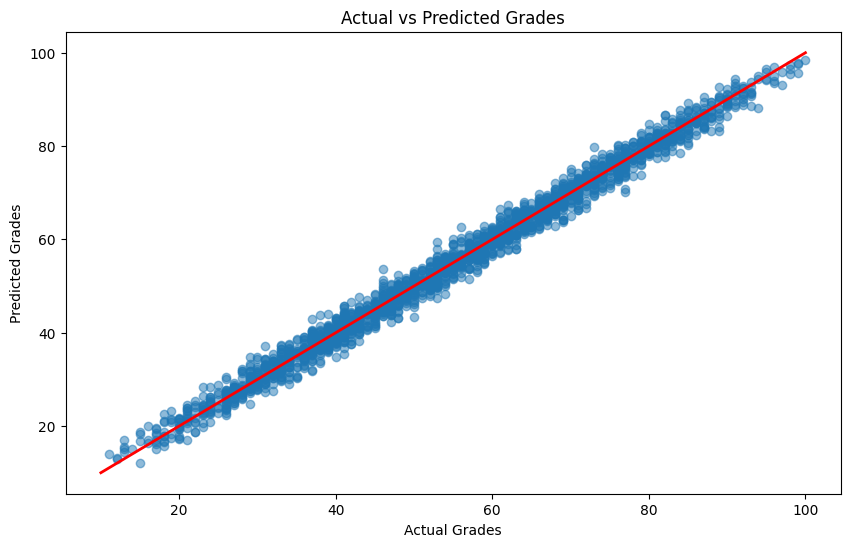

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], lw=2, color='red')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.show()